In [1]:
import numpy as np
import pandas as pd
Final_1=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/Final_1_corrt.csv")

In [2]:
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346812 entries, 0 to 346811
Data columns (total 22 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   IncidentNumber                        346812 non-null  object 
 1   CalYear                               346812 non-null  int64  
 2   HourOfCall                            346812 non-null  int64  
 3   IncidentGroup                         346812 non-null  int64  
 4   TravelTimeSeconds                     346812 non-null  float64
 5   DateOfCall_bis                        346812 non-null  object 
 6   MinuteOfCall                          346812 non-null  int64  
 7   DelayCodeId_bis                       346812 non-null  float64
 8   Joursem                               346812 non-null  int64  
 9   mois                                  346812 non-null  int64  
 10  jour                                  346812 non-null  int64  
 11  

In [3]:
Final_1['DateOfCall_bis'] = pd.to_datetime(Final_1['DateOfCall_bis'])
Final_1=Final_1.dropna()
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346811 entries, 0 to 346811
Data columns (total 22 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   IncidentNumber                        346811 non-null  object        
 1   CalYear                               346811 non-null  int64         
 2   HourOfCall                            346811 non-null  int64         
 3   IncidentGroup                         346811 non-null  int64         
 4   TravelTimeSeconds                     346811 non-null  float64       
 5   DateOfCall_bis                        346811 non-null  datetime64[ns]
 6   MinuteOfCall                          346811 non-null  int64         
 7   DelayCodeId_bis                       346811 non-null  float64       
 8   Joursem                               346811 non-null  int64         
 9   mois                                  346811 non-null  int6

In [4]:
from sklearn import linear_model,preprocessing
from sklearn.model_selection import train_test_split

In [5]:
data=Final_1.drop(['TravelTimeSeconds','IncidentNumber','DateOfCall_bis'], axis=1)
target=Final_1['TravelTimeSeconds']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=66)

In [7]:
X_train_scaled=preprocessing.scale(X_train)
scaler=preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
scaler=preprocessing.StandardScaler().fit(X_test)
X_test_scaled=scaler.transform(X_test)

In [8]:
from sklearn import neighbors,model_selection,ensemble,svm

In [10]:
knn=neighbors.KNeighborsRegressor()
parametres={'n_neighbors':range(2,40)}
grid_knn=model_selection.GridSearchCV(estimator=knn,param_grid=parametres)
grid_knn.fit(X_train_scaled,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 40)})

In [11]:
print('Meilleurs paramètres:',grid_knn.best_params_)
print(grid_knn.score(X_test_scaled,y_test))
y_pred=grid_knn.predict(X_test_scaled)
pd.crosstab(y_test,y_pred)

Meilleurs paramètres: {'n_neighbors': 39}
0.22815846348905


col_0,134.717949,136.256410,137.974359,138.102564,138.666667,138.794872,139.205128,139.461538,139.820513,141.487179,...,554.282051,558.230769,558.256410,559.051282,559.589744,563.102564,565.435897,568.461538,571.358974,602.512821
TravelTimeSeconds,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
rf=ensemble.RandomForestRegressor()
grid_rf=model_selection.GridSearchCV(estimator=rf, param_grid={'max_features':["squrt","log2",None]})
grid_rf.fit(X_train_scaled,y_train)
grid_rf.best_params_
print(grid_rf.score(X_test_scaled,y_test))
y_pred_rf=grid_rf.predict(X_test_scaled)


C:\Users\agrabia\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\agrabia\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\agrabia\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\agrabia\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_

0.4435590981984161


In [13]:
residus=abs(y_pred_rf-y_test)
residus.describe()

count    69363.000000
mean        64.006364
std         71.480182
min          0.000000
25%         21.300000
50%         45.300000
75%         80.350000
max       1003.630000
Name: TravelTimeSeconds, dtype: float64

In [14]:
y_test.describe()

count    69363.000000
mean       240.660165
std        128.627196
min          0.000000
25%        158.000000
50%        221.000000
75%        299.000000
max       1173.000000
Name: TravelTimeSeconds, dtype: float64

In [15]:
erreur=residus/y_test
erreur.describe()

count    6.936300e+04
mean              inf
std               NaN
min      0.000000e+00
25%      9.345716e-02
50%      2.028869e-01
75%      3.798354e-01
max               inf
Name: TravelTimeSeconds, dtype: float64

In [16]:
len(residus[residus<50])/len(residus)

0.5431137638222107

In [17]:
len(residus[residus<100])/len(residus)

0.8282369563023514

In [18]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score

In [19]:
dtc=DecisionTreeRegressor()
ac=AdaBoostRegressor(base_estimator=dtc,n_estimators=400)
ac.fit(X_train_scaled,y_train)
ac.score(X_test_scaled,y_test)
y_pred_ac=ac.predict(X_test_scaled)
pd.crosstab(y_test,y_pred_ac)

C:\Users\agrabia\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


col_0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,...,774.0,784.0,787.0,810.0,850.0,884.0,907.0,1013.0,1032.0,1102.0
TravelTimeSeconds,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,4,0,4,1,1,1,2,1,0,...,0,0,0,0,0,0,1,0,0,0
2.0,1,0,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3.0,0,2,2,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
ac.score(X_test_scaled,y_test)

0.480304914263025

In [21]:
svm_clf=svm.SVR()
svm_clf.fit(X_train_scaled,y_train)
print(svm_clf.score(X_test_scaled,y_test))
y_pred_svm=svm_clf.predict(X_test_scaled)
pd.crosstab(y_test,y_pred_svm)

0.22936923629329842


col_0,141.537267,142.407179,142.891517,143.684060,144.313980,144.570856,144.635347,145.705232,145.857152,145.891441,...,450.849171,452.185924,453.006899,454.218151,454.921462,455.424075,458.255084,459.086792,460.968155,467.318050
TravelTimeSeconds,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
ridge_reg=RidgeCV(alphas=(0.001,0.01,0.1,0.3,0.7,1,10,50,100))
ridge_reg.fit(X_train_scaled,y_train)
print('alpha',ridge_reg.alpha_)
print('R² train', ridge_reg.score(X_train_scaled,y_train))
print('R² test',ridge_reg.score(X_test_scaled,y_test))
ridge_pred_train=ridge_reg.predict(X_train_scaled)
ridge_pred_test=ridge_reg.predict(X_test_scaled)
print('erreur quadatrique train',mean_squared_error(y_train,ridge_pred_train))
print('erreur quadatrique test',mean_squared_error(y_test,ridge_pred_test))
ridge_reg.score(X_test_scaled,y_test)

alpha 50.0
R² train 0.22926690939349026
R² test 0.22532539918161243
erreur quadatrique train 12619.266767069805
erreur quadatrique test 12816.772106089666


0.22532539918161243

alpha [  5.06349448   0.           4.86883355  -0.         -50.40822441
  -0.           3.08864896  -0.          -0.57678062   0.
  -0.19584537   0.36461659  11.93258147  15.28114815   0.
  -0.          -0.           0.63798731   0.        ]


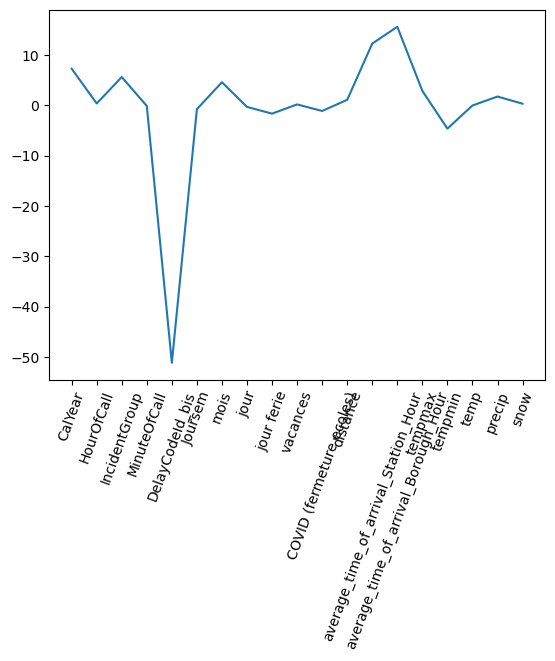

In [13]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
lasso_r=Lasso(alpha=1)
lasso_r.fit(X_train_scaled,y_train)
print('alpha',lasso_r.coef_)
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled,y_train)
coef=lasso_reg.coef_
plt.plot(range(len(data.columns)),coef)
plt.xticks(range(len(data.columns)),data.columns.values,rotation=70);

In [21]:
data.columns.values,lasso_r.coef_

(array(['CalYear', 'HourOfCall', 'IncidentGroup', 'MinuteOfCall',
        'DelayCodeId_bis', 'Joursem', 'mois', 'jour', 'jour ferie',
        'vacances', 'COVID (fermeture ecoles)', 'distance',
        'average_time_of_arrival_Station_Hour',
        'average_time_of_arrival_Borough_Hour', 'tempmax', 'tempmin',
        'temp', 'precip', 'snow'], dtype=object),
 array([  5.06349448,   0.        ,   4.86883355,  -0.        ,
        -50.40822441,  -0.        ,   3.08864896,  -0.        ,
         -0.57678062,   0.        ,  -0.19584537,   0.36461659,
         11.93258147,  15.28114815,   0.        ,  -0.        ,
         -0.        ,   0.63798731,   0.        ]))

In [14]:
print('R² train', lasso_reg.score(X_train_scaled,y_train))
print('R² test',lasso_reg.score(X_test_scaled,y_test))
lasso_pred_train=lasso_reg.predict(X_train_scaled)
lasso_pred_test=lasso_reg.predict(X_test_scaled)
print('erreur quadatrique train',mean_squared_error(y_train,lasso_pred_train))
print('erreur quadatrique test',mean_squared_error(y_test,lasso_pred_test))
lasso_reg.score(X_test_scaled,y_test)

R² train 0.2291739489467014
R² test 0.2251150098892699
erreur quadatrique train 12620.788814963053
erreur quadatrique test 12820.252937409894


0.2251150098892699

In [15]:
from sklearn.linear_model import lasso_path
mes_alphas=(0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0)
alpha_path,coefs_lasso,_=lasso_path(X_train_scaled,y_train,alphas=mes_alphas)
coefs_lasso.shape

C:\Users\agrabia\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53732037.51847458, tolerance: 2048969.9980000001
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\agrabia\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3229087610.4097595, tolerance: 2048969.9980000001
  model = cd_fast.enet_coordinate_descent_gram(


(19, 10)

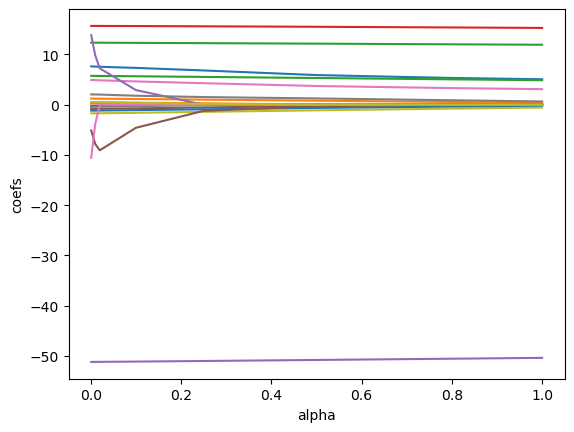

In [17]:
for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_path,coefs_lasso[i,:])
plt.xlabel('alpha')
plt.ylabel('coefs');

In [18]:
from sklearn.linear_model import LassoCV
model_lasso=LassoCV(cv=10)
model_lasso.fit(X_train_scaled,y_train)
alphas=model_lasso.alphas_
lasso_pred_test=model_lasso.predict(X_test_scaled)
print('score',model_lasso.score(X_test_scaled,y_test))
print('MSE',mean_squared_error(lasso_pred_test,y_test))

score 0.225220637116328
MSE 12818.50536482139
